## TropiSeq metrics : 

In [8]:
import pandas as pd 
import os 

path_seqbased = "/media/concha-eloko/Linux/PPT_clean/RF_2912_models_info"

header_metric = ["KL_type", "Effectifs","MCC","F1","recall","Accuracy","AUC"]
seqbased_df = pd.read_csv(f"{path_seqbased}/RF_report.0.75.2912.tsv", sep = "\t", names = header_metric)

In [6]:
mcc_tropiseq = {row["KL_type"] : row["MCC"] for _,row in seqbased_df.iterrows()}
tropiseq_tuple_effmcc = [(row["KL_type"], row["MCC"]) for _,row in seqbased_df.iterrows()]

In [7]:
seqbased_df

,KL_type,Effectifs,MCC,F1,recall,Accuracy,AUC
0,KL41,14,0.000000,0.000000,0.000000,0.833333,0.500000
1,KL30,116,0.390511,0.466667,0.411765,0.857143,0.674303
2,KL6,13,0.000000,0.000000,0.000000,0.800000,0.500000
3,KL19,117,0.747625,0.758621,0.611111,0.924731,0.805556
4,KL25,399,0.824502,0.851485,0.877551,0.953560,0.922352
...,...,...,...,...,...,...,...
84,KL20,19,-0.118345,0.000000,0.000000,0.727273,0.470588
85,KL142,19,-0.108465,0.000000,0.000000,0.777778,0.466667
86,KL58,10,0.000000,0.000000,0.000000,0.750000,0.500000
87,KL124,18,0.534522,0.500000,0.333333,0.866667,0.666667


***
## TropiGAT metrics :

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_models = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/ensemble_2812"
path_metrics = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/ensemble_2812_log_files/"

In [2]:
metrics_names = ["KL_type" , "n_prophages", "F1_score", "precision" , "recall", "MCC", "Accuracy", "AUC"]
df_metrics = pd.read_csv(f"{path_models}/Metric_Report.2812.tsv", sep = "\t", names = metrics_names)

df_metrics = df_metrics.drop_duplicates(subset = ["KL_type"], keep = "last")

df_metrics_sorted = df_metrics.sort_values(by='KL_type', key=lambda x: x.str.split("KL").str[1].astype(int))
df_metrics_sorted.reset_index(drop=True, inplace=True)


In [3]:
df_metrics_sorted
mcc_tropigat = {row["KL_type"] : row["MCC"] for _,row in df_metrics_sorted.iterrows()}


In [4]:
df_metrics_sorted

,KL_type,n_prophages,F1_score,precision,recall,MCC,Accuracy,AUC
0,KL1,190,0.5185185185185185,0.875000,0.368421,0.522151,0.885965,0.929086
1,KL2,351,0.8732394366197184,0.861111,0.885714,0.847579,0.957143,0.960653
2,KL3,145,0.7741935483870968,0.705882,0.857143,0.730199,0.918605,0.904762
3,KL5,28,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
4,KL7,37,0.8571428571428571,0.750000,1.000000,0.841625,0.952381,1.000000
...,...,...,...,...,...,...,...,...
62,KL136,32,0.5714285714285715,0.500000,0.666667,0.484481,0.842105,0.937500
63,KL145,29,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
64,KL149,70,0.75,0.666667,0.857143,0.700649,0.904762,0.844898
65,KL151,61,0.6153846153846153,0.571429,0.666667,0.533600,0.861111,0.683333


***

In [15]:
g1_group = ["KL2", "KL17", "KL47", "KL64", "KL106", "KL107"]
g2_group = ["KL1", "KL3", "KL14", "KL15", "KL23", "KL24", "KL25", "KL27", "KL51", "KL62", "KL102"]
g3_group = [kltype for kltype in mcc_tropiseq if kltype not in g1_group + g2_group]
g3_group = sorted(g3_group, key=lambda x: int(x.split("KL")[1]))

> gpt3.5 version : 

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

group_name_dico = {"group_a" : g1_group, "group_b" : g2_group, "group_c" : g3_group}

def plot_mcc_scores(group_name, color_tropigat, color_tropiseq, fontsize=10):
    group = group_name_dico[group_name]
    
    # Extract labels and MCC scores for the given group
    labels = group
    mcc_tropigat_scores = [max(mcc_tropigat.get(label, 0), 0) for label in labels]
    mcc_tropiseq_scores = [max(mcc_tropiseq.get(label, 0), 0) for label in labels]

    # Combine the scores and labels for both models
    all_labels = labels * 2
    all_scores = mcc_tropigat_scores + mcc_tropiseq_scores
    all_models = ['mcc_tropigat'] * len(labels) + ['mcc_tropiseq'] * len(labels)
    all_colors = [color_tropigat] * len(labels) + [color_tropiseq] * len(labels)

    # Calculate width proportionally based on the number of keys
    total_keys = len(labels)
    width_per_key = 0.8  # 0.8
    total_width = total_keys * width_per_key
    
    # Create a DataFrame for seaborn
    data = {'Label': all_labels, 'MCC Score': all_scores, 'Model': all_models, 'Color': all_colors}
    df = pd.DataFrame(data)

    # Plot using seaborn
    plt.figure(figsize=(total_width, 6))
    ax = sns.barplot(x='Label', y='MCC Score', hue='Model', palette={'mcc_tropigat': color_tropigat, 'mcc_tropiseq': color_tropiseq}, data=df)
    
    # Set x-axis label font size
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize)

    plt.title('MCC Scores for Different Labels')
    plt.xlabel('Labels')
    plt.xticks(rotation=90)
    plt.ylabel('MCC Score')
    plt.legend(title='Model')
    plt.savefig(f"/media/concha-eloko/Linux/papers/PPT/figures_draft/plot_MCC_{group_name}.3001.svg")
    plt.show()

    



In [75]:
def plot_mcc_scores(group_name, color_tropigat, color_tropiseq, fontsize_x=10,fontsize_y=10):
    group = group_name_dico[group_name]
    # Extract labels and MCC scores for the given group
    labels = group
    # Filter labels with non-zero MCC scores in at least one dictionary
    filtered_labels = [label for label in labels if mcc_tropigat.get(label, 0) > 0 or mcc_tropiseq.get(label, 0) > 0]
    mcc_tropigat_scores = [max(mcc_tropigat.get(label, 0), 0) for label in filtered_labels]
    mcc_tropiseq_scores = [max(mcc_tropiseq.get(label, 0), 0) for label in filtered_labels]

    # Combine the scores and labels for both models
    all_labels = filtered_labels * 2
    all_scores = mcc_tropigat_scores + mcc_tropiseq_scores
    all_models = ['mcc_tropigat'] * len(filtered_labels) + ['mcc_tropiseq'] * len(filtered_labels)
    all_colors = [color_tropigat] * len(filtered_labels) + [color_tropiseq] * len(filtered_labels)

    # Calculate width proportionally based on the number of keys
    total_keys = len(filtered_labels)
    width_per_key = 0.5  # (a,1.5) (b,1.5) (c,0.5)
    total_width = total_keys * width_per_key
    
    # Create a DataFrame for seaborn
    data = {'Label': all_labels, 'MCC Score': all_scores, 'Model': all_models, 'Color': all_colors}
    df = pd.DataFrame(data)

    # Plot using seaborn
    plt.figure(figsize=(total_width, 6))
    ax = sns.barplot(x='Label', y='MCC Score', hue='Model', palette={'mcc_tropigat': color_tropigat, 'mcc_tropiseq': color_tropiseq}, data=df)
    # Set x-axis label font size
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize_x)
    # Set y-axis label font size
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize_y)

    plt.title('MCC Scores for Different Labels')
    plt.xlabel('Labels')
    plt.xticks(rotation=90)
    plt.ylabel('MCC Score')
    plt.legend(title='Model')
    plt.savefig(f"/media/concha-eloko/Linux/papers/PPT/figures_draft/plot_MCC_{group_name}.t2.3001.svg")
    plt.show()



/tmp/ipykernel_26914/2062714661.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize_y)


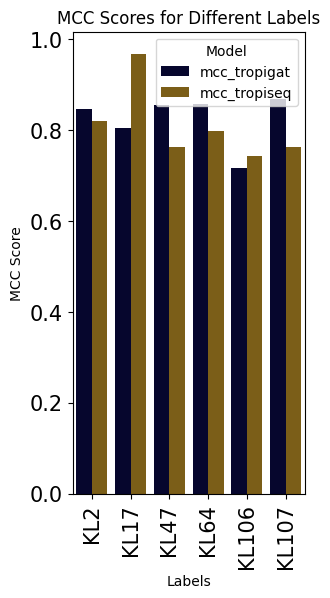

In [77]:
group_a_color = '#000033'  
group_b_color = '#8b6508'  
group_c_color = '#eead0e'  
others_color = '#dee2e6'  
# Example usage:
plot_mcc_scores("group_a", group_a_color, group_b_color, fontsize_x=15, fontsize_y=15)

In [3]:
62/137*100

45.25547445255474

In [4]:
30/74*100

40.54054054054054